Naive Bayes and KNN classification

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving redwine.csv to redwine.csv


**Data Preprocessing**

In [ ]:
data=pd.read_csv('redwine.csv')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.shape

(1599, 12)

**Mapping the data**

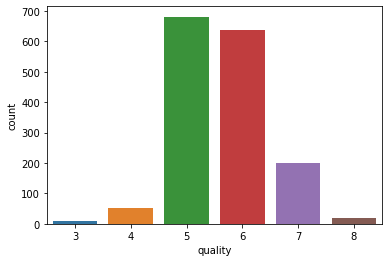

In [ ]:
sns.countplot(x='quality',data=data)

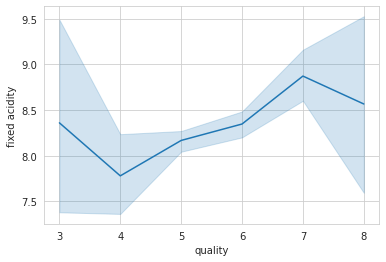

In [ ]:
#map each feature with quality for more insights
sns.set_style('whitegrid')
sns.lineplot(data=data, x="quality", y="fixed acidity")

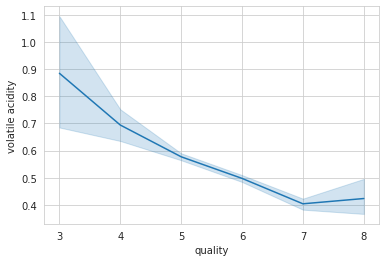

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'volatile acidity', data = data)

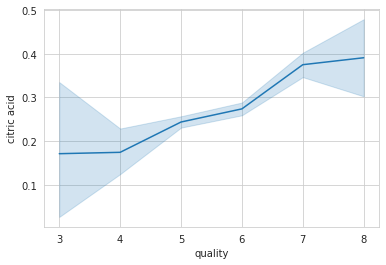

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'citric acid', data = data)

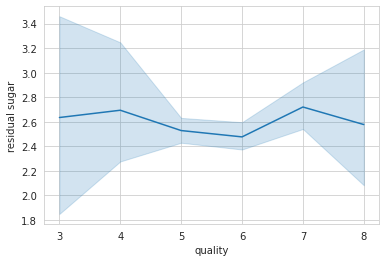

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'residual sugar', data = data)

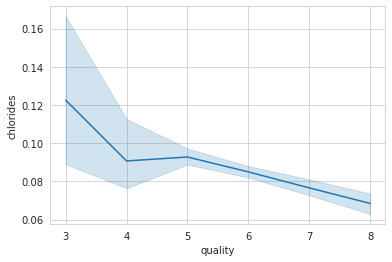

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'chlorides', data = data)

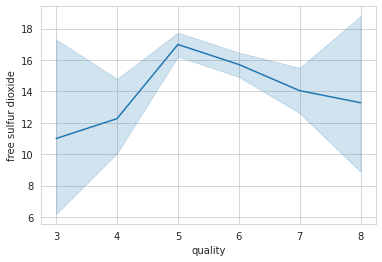

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'free sulfur dioxide', data = data)

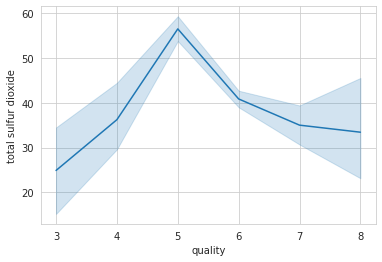

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'total sulfur dioxide', data = data)

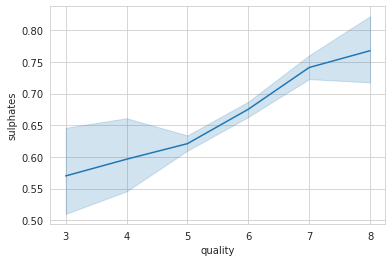

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'sulphates', data = data)

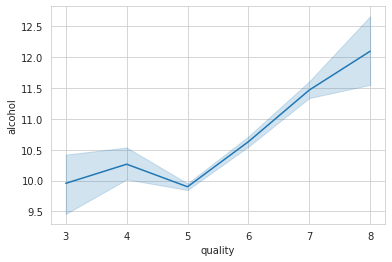

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'alcohol', data = data)

**Notes regarding quality of wine**
*   Fixed acidity does not provide much information
*   Volatile acidity composition decreases with increase in quality
*   Citric acid composition increases with increase in quality
*   Residual sugar has no relation with quality
*   Chloride composition decreases with increase in quality
*   Sulphates increase with quality 
*   Alcohol increases with quality of wine










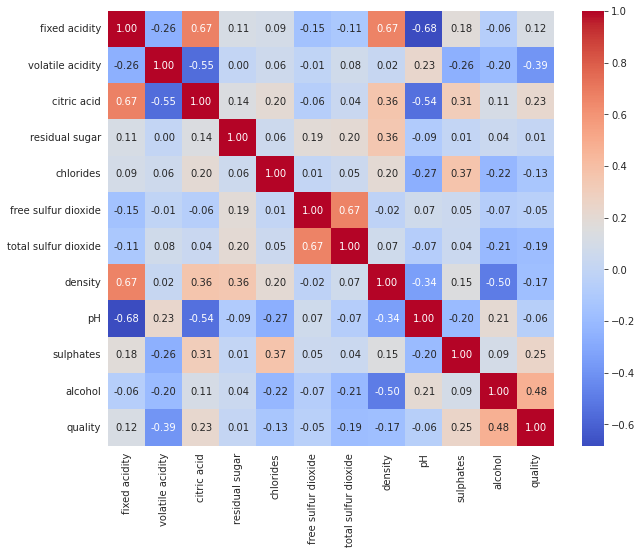

In [ ]:
#generate heat map
corr=data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

**Division of Wine**

Let's divide our wine data into two parts - good and bad and give limits for the quality

In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
#from 2 to 6.5 it is considered as bad and 6.5 to 8 as good

In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

In [ ]:
#Using Label encoder, transforming catagorical features to numerical features.
label_quality = LabelEncoder()

In [ ]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [ ]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


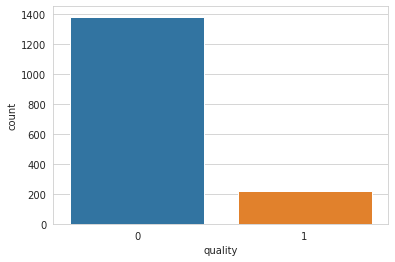

In [ ]:
sns.countplot(data['quality'])

**Fixing data imbalance to produce equal amount of good and bad quality of wine**

In [ ]:
#Now seperate the dataset as response variable and feature variabes
X = data.drop('quality', axis = 1)
y = data['quality']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = os.fit_resample(X, y)

In [ ]:
X_train_res.shape, y_train_res.shape

((2764, 11), (2764,))

**Creating the Model**

In [ ]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Naive Bayes Classifier**

In [ ]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
# Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.7797338062043945
Training set:  0.7734056987788331
Test set:  0.7884267631103075



CONFUSION MATRIX


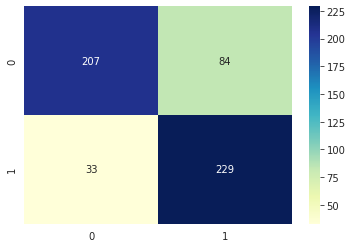

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_nb_test)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix, annot = True,fmt='d',cmap="YlGnBu")

**K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train =knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.8810423545717663
Training set:  0.9253731343283582
Test set:  0.8860759493670886



CONFUSION MATRIX


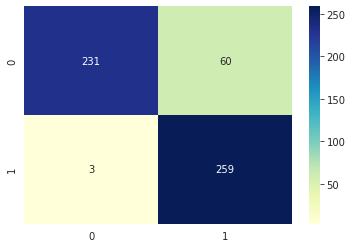

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_knn_test)
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix, annot = True,fmt='d',cmap="YlGnBu")